In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from alpha_vantage.timeseries import TimeSeries
%matplotlib inline

In [79]:
ts = TimeSeries(key='JFG6UD50HXSV2JQZ', output_format='pandas')

In [80]:
cefs = pd.read_csv('cefs.csv')
cefs_info = pd.read_csv('cefs_info.csv')

In [81]:
cefs_ret = pd.DataFrame()
for cef in cefs.columns[1:]:
    cefs_ret[cef] = round((cefs[cef]/cefs[cef].shift(1) - 1)*100,3)

In [82]:
def zscore(symbollist, period, threshold):
    zscores = pd.DataFrame()
    disc_prem = pd.DataFrame()
    for sym in symbollist:
        if sym =='RA':
            disc_prem[sym] = (cefs[sym][-period:] - cefs['X' + sym + 'IX'][-period:])/cefs['X' + sym + 'IX'][-period:]
            zscores[sym] = round((disc_prem[sym] - disc_prem[sym].mean())/np.std(disc_prem[sym]) , 2)
        else :
            disc_prem[sym] = (cefs[sym][-period:] - cefs['X' + sym + 'X'][-period:])/cefs['X' + sym + 'X'][-period:]
            zscores[sym] = round((disc_prem[sym] - disc_prem[sym].mean())/np.std(disc_prem[sym]) , 2)
            s = zscores[-1:].iloc[0]
            down = s.where(s < -threshold).dropna()
            up = s.where(s > threshold).dropna()
    print('Z-Score above ' + str(threshold) + ':\n' + str(up.sort_values(ascending = False)))
    print('Z-Score below ' + str(-threshold) + ':\n' + str(down.sort_values(ascending = True)))

In [83]:
global symbols_tot
symbols_tot = ['JLS', 'RA', 'JMT', 'FMY', 'JMM', 'PCM', 'DMO', 'EGF', 'BKT', 'AGC', 'AVK', 'ECF',
               'BCV', 'WIA', 'WIW', 'EXD', 'BTZ', 'DUC', 'GGM', 'VBF', 'JHS', 'JHI', 'ICB', 'PTY', 
               'PCN', 'PIM', 'GDO', 'IGI', 'PAI', 'WEA', 'BLW', 'EVV', 'EVG', 'FTF', 'ERC', 'BBN',
               'NBB', 'NBD', 'LDP', 'DFP', 'FPF', 'PSF', 'FFC', 'FLC', 'PFO', 'PFD', 'HPI',
               'HPF', 'HPS', 'PDT', 'JPC', 'JPI', 'JPS', 'ACP', 'AFT', 'DSU', 'FRA', 'BGT', 'BSL', 
               'BGB', 'EFL', 'EFT', 'EFF', 'EFR', 'EVF', 'FIV', 'FCT', 'VVR', 'VTA', 'JQC', 'JRO', 
               'JFR', 'NSL', 'JSD', 'PHD', 'PPR', 'TLI', 'NCV', 'NCZ', 'CBH', 'ACV', 'BHK', 'BIT', 
               'CHY', 'CHI', 'CCD', 'DSL', 'DBL', 'DCF', 'MGF', 'PCI', 'PDI', 'PGP', 'PHK', 'PKO', 
               'PFL', 'PFN', 'OPP', 'VGI', 'GFY', 'AWF', 'AIF', 'BGH', 'HYT', 'CIK', 'DHY', 'DHF', 
               'EHT', 'FSD', 'FHY', 'VLT', 'IVH', 'KIO', 'CIF', 'NHS', 'JCO', 'JHB', 'JHY', 'JHD', 
               'HNW', 'PHT', 'GHY', 'ISD', 'PCF', 'EAD', 'HIO', 'HYI', 'NFJ', 'CII', 'BDJ', 'BOE', 
               'BGY', 'INB', 'STK', 'EOI', 'EOS', 'ETJ', 'ETB', 'ETV', 'ETY', 'ETW', 'EXG', 'FFA', 
               'GNT', 'GPM', 'MCN', 'MSP', 'IGD', 'IGA', 'IRR', 'GDV', 'ETO', 'ETG', 'EVT', 'JTD', 
               'HTY', 'HTD', 'JTA', 'HIE', 'FOF', 'GOF', 'GGO', 'ZTR', 'NIE', 'DNP', 'MFV', 'DDF', 
               'NHF', 'GCV', 'DNI', 'RIV', 'TPZ', 'CSQ', 'BIF', 'CLM', 'CRF', 'GAB', 'GAM', 'USA', 
               'ASG', 'JCE', 'RVT', 'SOR', 'GGN', 'BGR', 'PEO', 'SZC', 'FIF', 'TTP', 'JRI', 'IGR', 
               'AWP', 'PGZ', 'NRO', 'RNP', 'RQI', 'RFI', 'JRS', 'RIF', 'MFD', 'BUI', 'UTF', 'DPG', 
               'GLU', 'GUT', 'UTG', 'MGU', 'ERH', 'HQH', 'THQ', 'BME', 'HQL', 'THW', 'FGB', 'BTO',
               'CEN', 'MIE', 'SRF', 'SRV', 'FPL', 'FEI', 'FEN', 'GMZ', 'GER', 'FMO', 'KYN', 'KMF',
               'KYE', 'KED', 'CBA', 'EMO', 'CTR', 'CEM', 'NML', 'JMF', 'SMM', 'NDP', 'TYG', 'NTG',
               'DSE', 'FCO', 'AGD', 'AOD', 'BWG', 'KMM', 'KST', 'FAM', 'HEQ', 'MCR', 'MIN', 'MMT',
               'JGH', 'RCS', 'PPT', 'GIM', 'IID', 'EOD', 'EHI', 'IDE', 'GLQ', 'BST', 'GDL', 'GGZ', 
               'GGT', 'RGT', 'INF', 'FEO', 'CGO', 'GLV', 'LCM', 'SCD', 'LGI', 'LOR', 'JDD', 'GLO', 
               'CHW', 'ABE', 'CEE', 'MSF', 'MSD', 'EDD', 'EDF', 'EDI', 'EMF', 'TEI', 'IHD', 'EMD',
               'GCH', 'JEQ', 'LAQ', 'SGF', 'APB', 'GRR', 'IFN', 'LDF', 'APF', 'CAF', 'IIF', 'MXE',
               'TDF', 'IAE',]

In [92]:
zscore(symbols_tot, 252, 2)

Z-Score above 2:
PTY    4.81
EOI    3.81
DDF    3.70
CHY    3.42
KST    3.05
HEQ    2.94
DNP    2.87
ETY    2.74
EOS    2.65
PFL    2.61
LGI    2.45
NCV    2.43
PCF    2.40
MSP    2.36
CHW    2.27
NTG    2.26
PFN    2.25
KMM    2.19
PCN    2.19
BST    2.16
CEN    2.10
ETO    2.03
Name: 256, dtype: float64
Z-Score below -2:
FMY   -3.58
FPF   -2.24
JMM   -2.09
DHY   -2.05
EVG   -2.01
Name: 256, dtype: float64


In [85]:
def plotting(symbol, period):
    
    nav = 'X'+ symbol + 'X'
    
    disc_prem = (cefs[symbol][-period:] - cefs['X' + symbol + 'X'][-period:])/cefs['X' + symbol + 'X'][-period:]

    z_score = round((disc_prem - disc_prem.mean())/np.std(disc_prem) , 2)
    price_1 = round((-2 * np.std(disc_prem) + disc_prem.mean()) * cefs[nav][-1:] + cefs[nav][-1:], 2)
    price_2 = round((2 * np.std(disc_prem) + disc_prem.mean()) * cefs[nav][-1:] + cefs[nav][-1:], 2)
    price_3 = round((-1 * np.std(disc_prem) + disc_prem.mean()) * cefs[nav][-1:] + cefs[nav][-1:], 2)
    price_4 = round((1 * np.std(disc_prem) + disc_prem.mean()) * cefs[nav][-1:] + cefs[nav][-1:], 2)
    price_5 = round((0 * np.std(disc_prem) + disc_prem.mean()) * cefs[nav][-1:] + cefs[nav][-1:], 2)
    
    
    print('Current Price: ' + str(cefs[symbol][-1:].iloc[0]))
    print('Current Z-score: ' + str(z_score[-1:].iloc[0]))
    print('Price for Z-score=-2: ' + str(price_1.iloc[0]))
    print('Price for Z-score=-1: ' + str(price_3.iloc[0]))
    print('Price for Z-score=0: ' + str(price_5.iloc[0]))
    print('Price for Z-score=1: ' + str(price_4.iloc[0]))
    print('Price for Z-score=2: ' + str(price_2.iloc[0]))
    print('Current Disc/Prem: ' + str(round(disc_prem[-1:].iloc[0]*100, 2)))
    print(str(period) + '-day Disc/Prem Avr: ' + str(round(disc_prem.mean()*100,2)))
    print(str(period) + '-day Disc/Prem High: ' + str(round(disc_prem.max()*100,2)))
    print(str(period) + '-day Disc/Prem Low: ' + str(round(disc_prem.min()*100,2)))
    print(str(period) + '-day Corr with Nav: ' + str(round(cefs_ret[symbol][-period:].corr(cefs_ret[nav][-period:]),2)))
    print('Distribution: ' + cefs_info[symbol][0])
    print('Distr Freq: ' + cefs_info[symbol][1])
    print('Ex-Date: ' + cefs_info[symbol][2])
    print(str(period) + '-day CorrReturns:\n ' + str(pd.DataFrame(round(cefs_ret[-period:].corr()[symbol].nlargest(11)[1:],2)).T))
    
    
    plt.figure(figsize = (8,6))
    plt.plot(z_score)
    plt.grid(True)
    plt.title('Z-Score')
    plt.axhline(2, color = 'red')
    plt.axhline(-2, color = 'red')
    plt.axhline(1, color = 'green')
    plt.axhline(-1, color = 'green')
    
    fig,ax = plt.subplots(figsize = (8,6))
    ax.plot(cefs[symbol][-period:])
    ax.plot(cefs[nav][-period:])
    plt.grid(True)
    plt.legend();

Current Price: 24.9545
Current Z-score: -0.2
Price for Z-score=-2: 23.54
Price for Z-score=-1: 24.33
Price for Z-score=0: 25.11
Price for Z-score=1: 25.9
Price for Z-score=2: 26.68
Current Disc/Prem: 16.77
252-day Disc/Prem Avr: 17.51
252-day Disc/Prem High: 25.48
252-day Disc/Prem Low: 5.93
252-day Corr with Nav: 0.17
Distribution: 0.205
Distr Freq: Monthly
Ex-Date: 04/19/2018
252-day CorrReturns:
      CSQ   ACV   NCZ   SOR   CHI   GDV   LOR   ETW   NIE   EXG
DMO  0.4  0.39  0.38  0.38  0.38  0.38  0.37  0.37  0.37  0.37


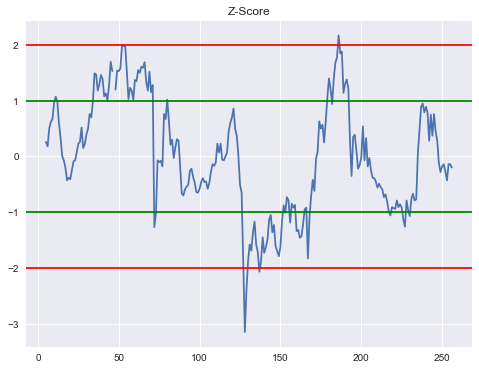

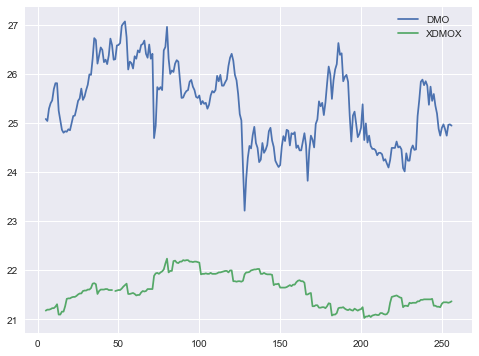

In [94]:
plotting('DMO', 252)

In [35]:
round(cefs_ret.corr()['IGI'].nlargest(10)[1:],2)

ERC    0.26
PPT    0.26
IVH    0.26
CHI    0.25
NCZ    0.25
CCD    0.24
RNP    0.24
JPS    0.24
HPF    0.24
Name: IGI, dtype: float64

In [569]:
pd.DataFrame(round(cefs.corr()['PSF'].nlargest(11)[1:],2)).T

,XJPCX,XDFPX,DFP,XPSFX,FPF,HPF,XZTRX,RNP,PDT,VBF
PSF,0.94,0.92,0.92,0.91,0.91,0.91,0.91,0.9,0.9,0.9


In [54]:
cefs_info['JLS'][1]

'Monthly'